In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Traing & Testing Data Array

In [2]:
img_data = np.random.randn(250000,1)
img_hat = np.random.randn(250000,1)


## Show Training Picture && Get Data

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


250000


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


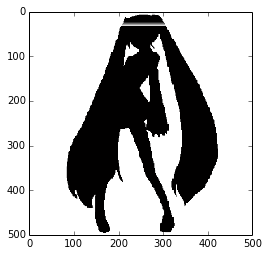

In [3]:
muki = np.zeros((500,500,3))
muki.fill(1)
plt.imshow(muki)

import random

f = open('./muki.txt','rb')
count = 0
for line in f:
    y,x,c = line.split()
    x = (float(x) )*100. + 250
    y = (float(y) )*100. + 250
    c = float(c)
    
    img_data[count] = c
    
    if c == 0 :
        muki[x][y][0] = 1#random.random()
        muki[x][y][1] = 1#random.random()
        muki[x][y][2] = 1#random.random()        
    else:
        muki[x][y][0] = 255#random.random()
        muki[x][y][1] = 0#random.random()
        muki[x][y][2] = 0#random.random()
    count += 1
#     print x ,y 
#     if count > 10000 : break
plt.imshow(muki)
print count


In [4]:
import numpy as np
import theano 
import theano.tensor as T

## Muki NN
<img width=500px src='./muki_nn.png' />

In [5]:
x = T.matrix(name='x',dtype='float32')
y = T.matrix(name='x',dtype='float32')

In [6]:
w1 = theano.shared(np.random.randn(128,250000))
b1 = theano.shared(np.random.randn(128))
w2 = theano.shared(np.random.randn(250000,128))
b2 = theano.shared(np.random.randn(250000))

## 需採用 dimshuffle
* 請參考 ?b1.dimshuffle()

In [7]:
z1 = T.dot(w1,x) + b1.dimshuffle(0,'x')

In [8]:
a1 = 1/(1+T.exp(-z1))

## 輸出第一層

In [9]:
fa1 = theano.function(inputs=[x],outputs=[a1],allow_input_downcast=True)
fa1(np.random.randn(250000,1))

[array([[  1.00000000e+000],
        [  1.00000000e+000],
        [  0.00000000e+000],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  5.28690129e-171],
        [  1.57110615e-072],
        [  1.80434275e-247],
        [  1.65799053e-213],
        [  1.00000000e+000],
        [  6.52990366e-197],
        [  1.00000000e+000],
        [  0.00000000e+000],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  1.02730794e-298],
        [  3.72778679e-130],
        [  7.32678678e-029],
        [  1.00000000e+000],
        [  3.28802290e-177],
        [  8.96053110e-114],
        [  5.00514269e-058],
        [  1.00000000e+000],
        [  4.86868462e-264],
        [  1.84968957e-068],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  3.90395790e-040],
        [  1.00000000e+000],
        [  2.64023358e-021],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  4.42540261e-146],
        [  2.54557857e-164],
        [  4.3

In [10]:
z2 = T.dot(w2,a1) + b2.dimshuffle(0,'x')
a2 = 1/(1+T.exp(-z2))
fa2 = theano.function(inputs=[x],outputs=[a2],allow_input_downcast=True)

## 輸出第二層

In [11]:
fa2(np.random.randn(250000,1))[0]

array([[  9.37658045e-01],
       [  1.12252779e-05],
       [  9.14919372e-01],
       ..., 
       [  4.16488108e-01],
       [  3.89742311e-03],
       [  3.36489083e-04]])

In [12]:
y_hat = T.matrix('reference',dtype='float32')
cost = T.sum((a2-y_hat)**2)/250000

In [13]:
dw1,db1,dw2,db2 = theano.grad(cost,[w1,b1,w2,b2])

In [14]:

def Myupdates(ps,gs):
    from itertools import izip
 
    r = 1
    pu = [ (p,p-r*g) for p,g in izip(ps,gs)   ]
    return pu

In [ ]:
train = theano.function(inputs=[x,y_hat],
                        outputs=[a2,cost],
                        updates=Myupdates([w1,b1,w2,b2],[dw1,db1,dw2,db2]),
                        allow_input_downcast=True,
                                           )

In [ ]:

img_hat = img_data
for i in range(10000):
    img_predict,cost_predict = train(img_data,img_hat)
    if i%10 == 0:
        print cost_predict

0.448445344367
0.448399575946
0.448428596205
0.448364785352
0.448356236235
0.448359697005
0.448286352288

## 將結果輸出成圖片

In [ ]:

def showimg(img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            muki_pr[y][x] = l[count]
            count += 1
    plt.imshow(muki_pr)
    
showimg(img_data)
